# Serverless API example

import...

In [1]:
from __future__ import print_function
from keras.datasets import mnist
from sklearn.pipeline import Pipeline
from sklearn import metrics
import xgboost
from sklearn.decomposition import PCA
import pickle
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## MNIST dataset

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 784)
60000 train samples
10000 test samples


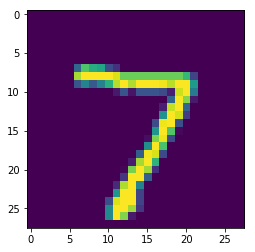

In [3]:
plt.imshow(x_test[0].reshape(28,28));

---
## Build Classifier with PCA-XGBoost

In [4]:
pipeline = Pipeline([('pca',PCA(n_components=10)), ('xgb',xgboost.XGBClassifier(max_depth=10,n_estimators=10))])

In [5]:
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_dept...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [6]:
metrics.accuracy_score(y_test, pipeline.predict(x_test))

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8836

Save classifier file to be uploaded to Lambda

In [7]:
pickle.dump(file=open('xgb_mnist_pipe.pckl','wb'),obj=pipeline)

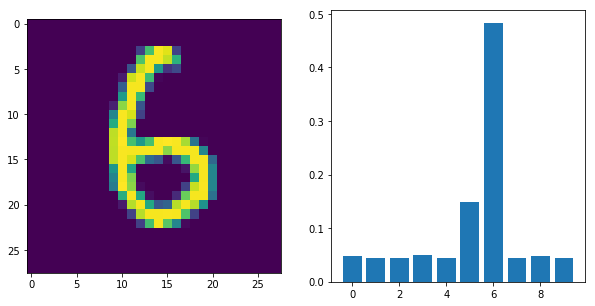

In [9]:
sample_id = 21
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(x_test[sample_id].reshape(28,28))
plt.subplot(122),plt.bar(range(10),pipeline.predict_proba(np.expand_dims(x_test[sample_id],axis=0)).tolist()[0]);

In [79]:
int(pipeline.predict(np.expand_dims(x_test[sample_id],axis=0))[0])

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


9

---
### Testing the API service

In [10]:
import json
import requests

In [11]:
service_url = 'https://6t4p4l2bed.execute-api.us-east-2.amazonaws.com/serverless_deploy'

In [24]:
sample_id = 109
digit_json = json.dumps({"digit":x_test[sample_id].tolist()})

r = requests.post(service_url, json={"body":digit_json})
print(r.json()['body'], "real: %d"%(y_test[sample_id]))

{"prediction": 4} real: 4
